In [2]:
from ultralytics import YOLO
import os
from utils import plot_BB_center, plot_BB_center_conf

def grading(model, image_directory, output_directory):
    # Check if the image directory is empty
    if not os.listdir(image_directory):
        print(f"Image directory {image_directory} is empty.")
        return

    # Check if the output directory exists, if not, create it
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    for filename in os.listdir(image_directory):
        # Check if the file is an image file
        if filename.endswith('.jpg') or filename.endswith('.png'):
            try:
                # Try to predict the image
                results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)
            except Exception as e:
                # If prediction fails (e.g., due to an invalid image), print an error message and skip to the next file
                print(f"Failed to predict for file {filename}. Error: {str(e)}")
                continue

            txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
            
            # Check if results have any detections
            detections = False
            for result in results:
                if len(result.boxes) > 0:
                    detections = True
                    try:
                        # Try to save the results to a text file
                        result.save_txt(txt_filename)
                    except Exception as e:
                        # If saving fails (e.g., due to no write permission), print an error message
                        print(f"Failed to save results to file {txt_filename}. Error: {str(e)}")
                    break
            
            # If no detections, create an empty txt file
            if not detections:
                try:
                    # Try to create an empty text file
                    with open(txt_filename, 'w') as f:
                        f.write('')
                except Exception as e:
                    # If file creation fails (e.g., due to no write permission), print an error message
                    print(f"Failed to write to file {txt_filename}. Error: {str(e)}")
        else:
            print(f"File {filename} is not an image file. Skipping.")

Matplotlib is building the font cache; this may take a moment.


In [1]:
%pip install ultralytics

  Obtaining dependency information for tbb==2021.* from https://files.pythonhosted.org/packages/7b/2d/1e1c70fae8ace27e6200fb71c2372a9aeac2baba474b1609d7d466e969b4/tbb-2021.12.0-py3-none-win_amd64.whl.metadata
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
  Attempting uninstall: tbb
    Found existing installation: TBB 0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [19]:
def grading_v2(model, image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            results = model.predict(os.path.join(image_directory, filename), save=True, stream=True)
            txt_filename = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
            # Check if results have any detections
            detections = False
            with open(txt_filename, 'w') as f:
                for result in results:
                    if len(result.boxes) > 0:
                        detections = True
                        boxes = result.boxes  
                        conf_scores = boxes.conf
                        classes = boxes.cls
                        w_orig, h_orig = result.orig_shape
                        print("width img:", w_orig)
                        print("h img:", h_orig)
                        for i in range(len(boxes)):
                            x1, y1, x2, y2 = boxes[i].xywh[0].cpu().numpy().astype(int)
                            print("Original res not scaled:", x1, y1, x2, y2)
                            cls = int(classes[i])
                            x1_norm = x1 / h_orig
                            x2_norm = x2 / h_orig
                            y1_norm = y1 / w_orig
                            y2_norm = y2 / w_orig
                            f.write(f"{cls} {x1_norm:.4f} {y1_norm:.4f} {x2_norm:.4f} {y2_norm:.4f} {conf_scores[i]:.4f}\n")
                # Empty file if no detections (consistency with previous behavior)
                if not detections:
                    f.write('')

In [5]:
model = YOLO("model_path/Yolov5m_Colab_18_05_2024_889_v3_Sone/train10/weights/best.pt")

# # IMPORTANT: do not delete => this is a bug model can't inference any multiplicative images
# model1 = YOLO("model_path/YOLOv8_Colab_30_04_2024_v2_Ha/weights/best.pt")

image_directory = 'FINAL_test/images'
output_directory = 'FINAL_test/labels/predict/CCWH'
output_directory_conf_score = 'FINAL_test/labels/predict/CCWH with conf scores'
os.makedirs(output_directory, exist_ok=True)
os.makedirs(output_directory_conf_score, exist_ok=True)

In [22]:
# grading_v2(model, image_directory, output_directory)
grading(model, image_directory, output_directory)
grading_v2(model, image_directory, output_directory_conf_score)



image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-045.jpg: 896x1280 224 nom_chars, 4312.8ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-046.jpg: 864x1280 242 nom_chars, 4494.0ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-047.jpg: 864x1280 205 nom_chars, 3863.8ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-048.jpg: 896x1280 187 nom_chars, 4365.0ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-049.jpg: 896x1280 176 nom_chars, 4299.4ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-050.jpg: 864x1280 190 nom_chars, 4064.0ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0140-01-016.jpg: 1120x1280 66 nom_chars, 5687.9ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0140-01-017.jpg: 1120x1280 137 nom_chars, 5176.9ms

image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0174-03-013.jpg: 1024x1280 300 n

In [17]:
import os

def add_confidence_score(directory):
    # Iterate through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):  # Ensure we're working with .txt files
            filepath = os.path.join(directory, filename)
            
            # Read the file content
            with open(filepath, 'r') as file:
                lines = file.readlines()
            
            # Modify each line to add confidence score of 1
            new_lines = []
            for line in lines:
                line = line.strip()  # Remove any leading/trailing whitespace/newlines
                if line:  # Check if the line is not empty
                    new_line = f"{line} 1\n"
                    new_lines.append(new_line)
            
            # Write the new content back to the file
            with open(filepath, 'w') as file:
                file.writelines(new_lines)

# Specify the directory containing your ground truth label files
directory = 'FINAL_test/labels/ground_truth/LTRB'

# Call the function to add confidence scores
add_confidence_score(directory)

print("Confidence scores added to all files.")


Confidence scores added to all files.


In [3]:
# Plotting predicted bounding boxes with trained models on images
output_directory = 'FINAL_test/labels/predicts/CCWH_conf'
image_directory = 'FINAL_test/images'

for filename in os.listdir(image_directory):
    img_pth = os.path.join(image_directory, filename)
    print(img_pth)
    coord_path = os.path.join(output_directory, os.path.splitext(filename)[0] + '.txt')
    plot_BB_center_conf(img_pth, coord_path)

FINAL_test/images\nlvnpf-0137-01-045.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'FINAL_test/labels/predicts/CCWH_conf\\nlvnpf-0137-01-045.txt'

In [8]:
from utils import convert_coord

convert_coord("FINAL_test/labels/ground_truth/CCWH/", "FINAL_test/labels/ground_truth/LTRB/")
convert_coord("FINAL_test/labels/predict/CCWH/", "FINAL_test/labels/predict/LTRB/")


image 1/1 d:\Documents\GitHub\NomOCR\FINAL_test\images\nlvnpf-0137-01-048.jpg: 896x1280 187 nom_chars, 9487.0ms
Speed: 44.0ms preprocess, 9487.0ms inference, 3247.0ms postprocess per image at shape (1, 3, 896, 1280)
608
900


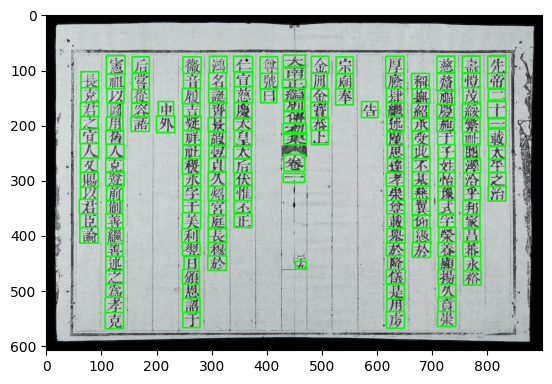

In [4]:
import cv2
import matplotlib.pyplot as plt
# Checking with a random image when it is rotated.
img = cv2.imread("FINAL_test/images/nlvnpf-0137-01-048.jpg")
def rotate_image(image, angle):
    height = image.shape[0]
    width = image.shape[1]
    center = (width/2, height/2)
    size = (width, height)
    rot_mat = cv2.getRotationMatrix2D(center, angle, 1.0)
    res = cv2.warpAffine(image, rot_mat, size)
    return res
    
img_gray_rotated = rotate_image(img, 45)

results = model.predict("FINAL_test/images/nlvnpf-0137-01-048.jpg")
for result in results:
    boxes = result.boxes  
    conf_scores = boxes.conf
    w, h = result.orig_shape
    for i in range(len(boxes)):
        if(conf_scores[i] > 0.7):
            x1, y1, x2, y2 = boxes[i].xyxy[0].cpu().numpy().astype(int)
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2) 
    plt.imshow(img)

print(w)
print(h)

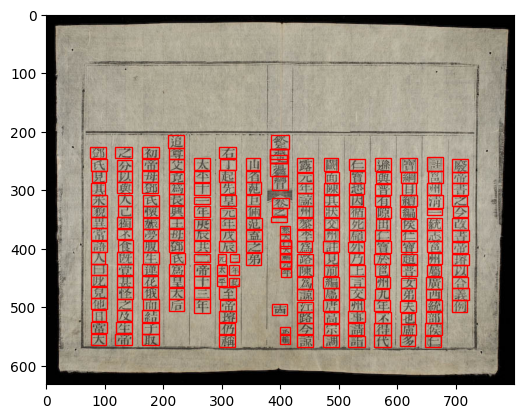

In [12]:
plot_BB_center_conf("FINAL_test/images/nlvnpf-0174-03-014.jpg", "FINAL_test/labels/predict/CCWH_conf/nlvnpf-0174-03-014.txt")